## Introduction
This dataset contains information on over 1000 roller coasters in the World, their name, their speed, location and other attributes

In [1]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import re

In [103]:
# initializing Seaborn
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize": (12,12)})
plot_color = '#08306B'
title_font = {'family': 'Comic Sans MS', 'size': 17}
label_font = {'family': 'Comic Sans MS', 'size': 14}

In [3]:
# importing the data
url = 'https://raw.githubusercontent.com/kedeisha1/Challenges/main/coaster_db.csv'

# reading the data
week7 = pd.read_csv(url) 

In [4]:
# first five rows
week7.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [5]:
# column names and datatype of columns
week7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

In [6]:
# statistical description of data
week7.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [ ]:
# renaming some columns
week7.rename({'coaster_name':'Coaster_Name', 'year_introduced':'Year_Introduced', 'opening_date_clean':'Opening_Date', 
                'speed_mph':'Speed_mph', 'height_ft':'Height_ft', 'Inversions_clean':'inversions', 'Gforce_clean':'Gforce'}, 
                axis= 1, inplace=True)

week7.columns

In [ ]:
# number of rows and columns
week7.shape

In [79]:
# checking for outliers in the speed
week7[week7['Speed_mph'] >= 100]

,Coaster_Name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,Speed_mph,height_value,height_unit,Height_ft,inversions,Gforce
429,Superman: Escape from Krypton,"1,235 ft (376.4 m)",100 mph (160.9 km/h),Other,Operating,"March 15, 1997",Steel – Launched – Shuttle – Dueling,Intamin,48 in (122 cm),Reverse Freefall Coaster,...,100 mph,160.9 km/h,100.0,mph,100.0,415.0,ft,NaN,0,4.5
431,Tower of Terror II,"376.4 m (1,235 ft)",160.9 km/h (100.0 mph),Dreamworld,Removed,23 January 1997Tower of Terror),Steel – Launched – Shuttle,Intamin,120 cm (3 ft 11 in),Reverse Freefall Coaster,...,160.9 km/h,100.0 mph,160.9,km/h,100.0,115.0,m,377.3,0,4.5
569,Do-Dodonpa,"1,244 m (4,081 ft)",180 km/h (110 mph),Fuji-Q Highland,Closed,21 December 2001,Steel,S&S – Sansei Technologies,130 cm (4 ft 3 in),Air-Launched Coaster,...,180 km/h,110 mph,180.0,km/h,111.8,49.0,m,160.8,1,NaN
642,Top Thrill Dragster,"2,800 ft (850 m)",120 mph (190 km/h),Cedar Point,Closed,"May 4, 2003",Steel – Launched,Intamin,52–78[1] in (132–198 cm),Accelerator Coaster,...,120 mph,190 km/h,120.0,mph,120.0,420.0,ft,NaN,0,NaN
685,Kingda Ka,"3,118 ft (950 m)",128 mph (206 km/h),Six Flags Great Adventure,Operating,"May 21, 2005",Steel – Launched,Intamin,54–77 in (137–196 cm),Accelerator Coaster,...,128 mph,206 km/h,128.0,mph,128.0,456.0,ft,NaN,0,NaN
812,Formula Rossa,"2,000 m (6,562 ft)",240 km/h (149.1 mph),Ferrari World Abu Dhabi,Operating,4 November 2010,Steel – Launched,Intamin,140–195 cm (4 ft 7 in–6 ft 5 in),Accelerator Coaster,...,240 km/h,149.1 mph,240.0,km/h,149.1,52.0,m,170.6,0,4.8
993,Red Force (roller coaster),"880 m (2,890 ft)",180 km/h (112 mph),Ferrari Land,Operating,7 April 2017,Steel – Launched,Intamin,140–195 cm (4 ft 7 in–6 ft 5 in),NaN,...,180 km/h,112 mph,180.0,km/h,111.8,112.0,m,367.5,0,NaN


### Are there any duplicated rows?

In [9]:
# number of duplicated rows
n_duplicated = week7.duplicated().sum()
print(f'There are {n_duplicated} duplicated rows')

There are 0 duplicated rows


In [57]:
n_duplicated_name = week7.duplicated(subset=['Coaster_Name']).sum()
print(f'Although there are {n_duplicated_name} roller coasters with the same name')

Although there are 97 roller coasters with the same name


### What are the top 3 years with the most roller coasters introduced?

In [10]:
# top 3 years 
top_3 = week7['Year_Introduced'].value_counts()[:3].index.values
print(f'The top 3 years with the most roller coasters are {top_3}')

The top 3 years with the most roller coasters are [1999 2000 1998]


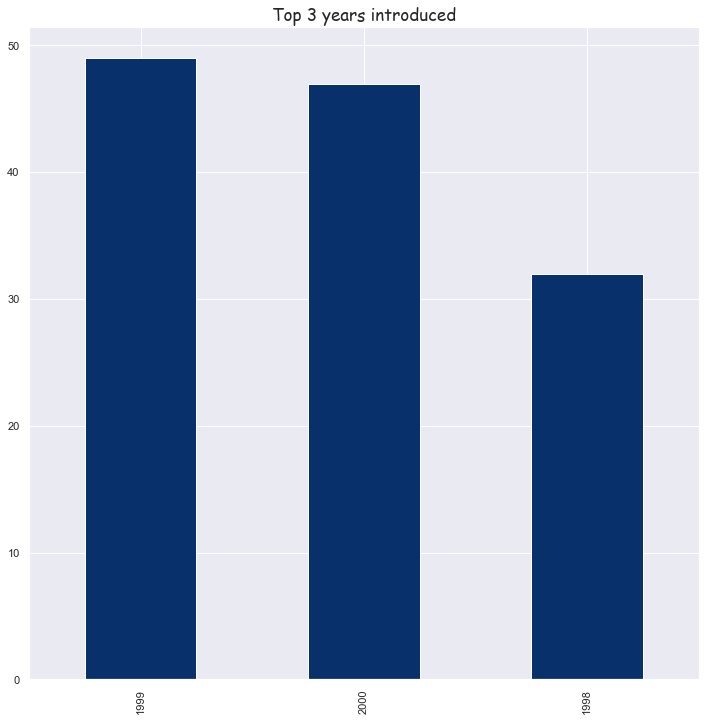

In [65]:
# graph of top 3 years
week7['Year_Introduced'].value_counts()[:3].sort_values(ascending=False).plot(kind='bar', color = plot_color)
plt.title('Top 3 years introduced', fontdict=title_font);

### What is the average speed? Also display a plot to show it's distribution.

In [12]:
# getting the average speed
average_speed = week7['speed1_value'].mean()
print(f'The Average speed is {average_speed} mph')

The Average speed is 53.8503735325507 mph


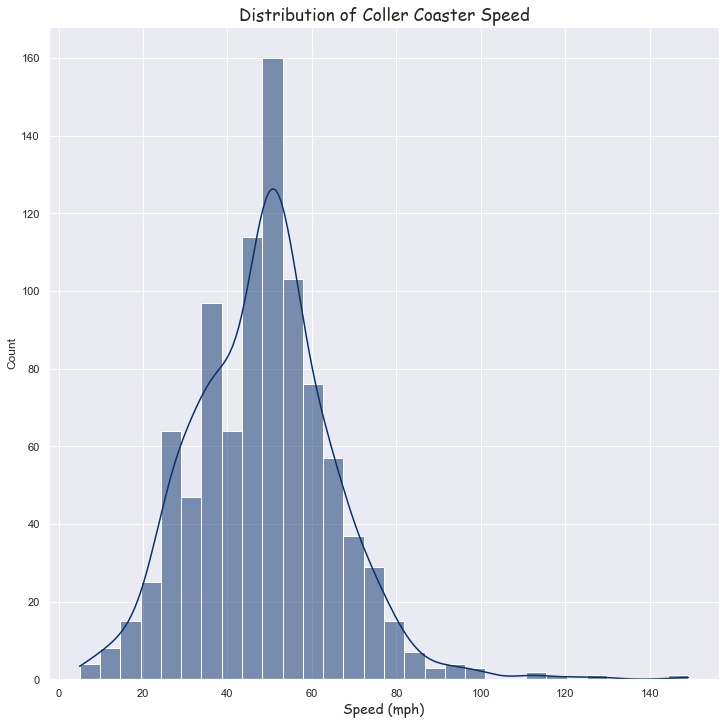

In [80]:
# histogram showing the distribution of roller coaster speed
sns.histplot(week7['Speed_mph'], color=plot_color, kde=True, bins=30)
plt.title("Distribution of Coller Coaster Speed", fontdict=title_font)
plt.xlabel('Speed (mph)', fontdict=label_font);

The distribution is right skewed with most roller coasters having speed between 40 and 50 mph. There are exceptions like the Formula Rossa in Dubai which goes up to 150 mph and Kingda Ka and Top Thrill Dragster in US which goes above 12 mph

### Explore the feature relationships. Are there any positively or negatively correlated relationships?

In [14]:
# extract number from the Max vertical angle column
week7['Max vertical angle'] = week7['Max vertical angle'].str.extract(r'([0-9]{2})').astype('float')


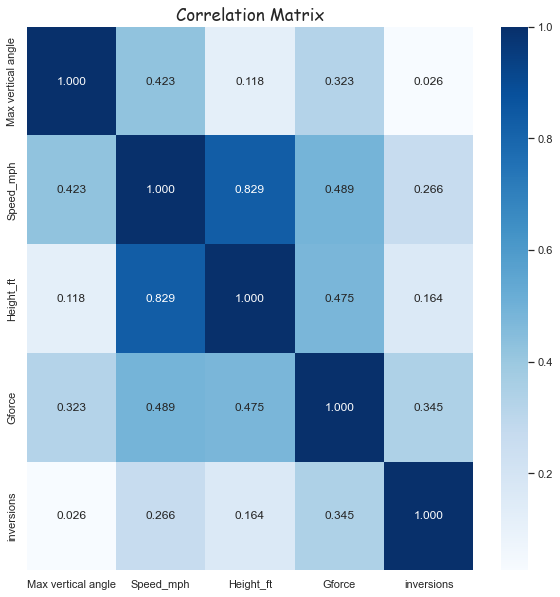

In [62]:
# define the variables to be used
vars=week7[['Max vertical angle', 'Speed_mph', 'Height_ft', 'Gforce', 'inversions']]

# set figure size
plt.figure(figsize=[10,10])

# plot heatmap
sns.heatmap(vars.corr(), annot = True, fmt = '.3f', cmap='Blues')

# display graph labels
plt.title('Correlation Matrix', fontdict=title_font);

There is a positive correlation between height and speed. Other pairs don't seem to have significant correlation.

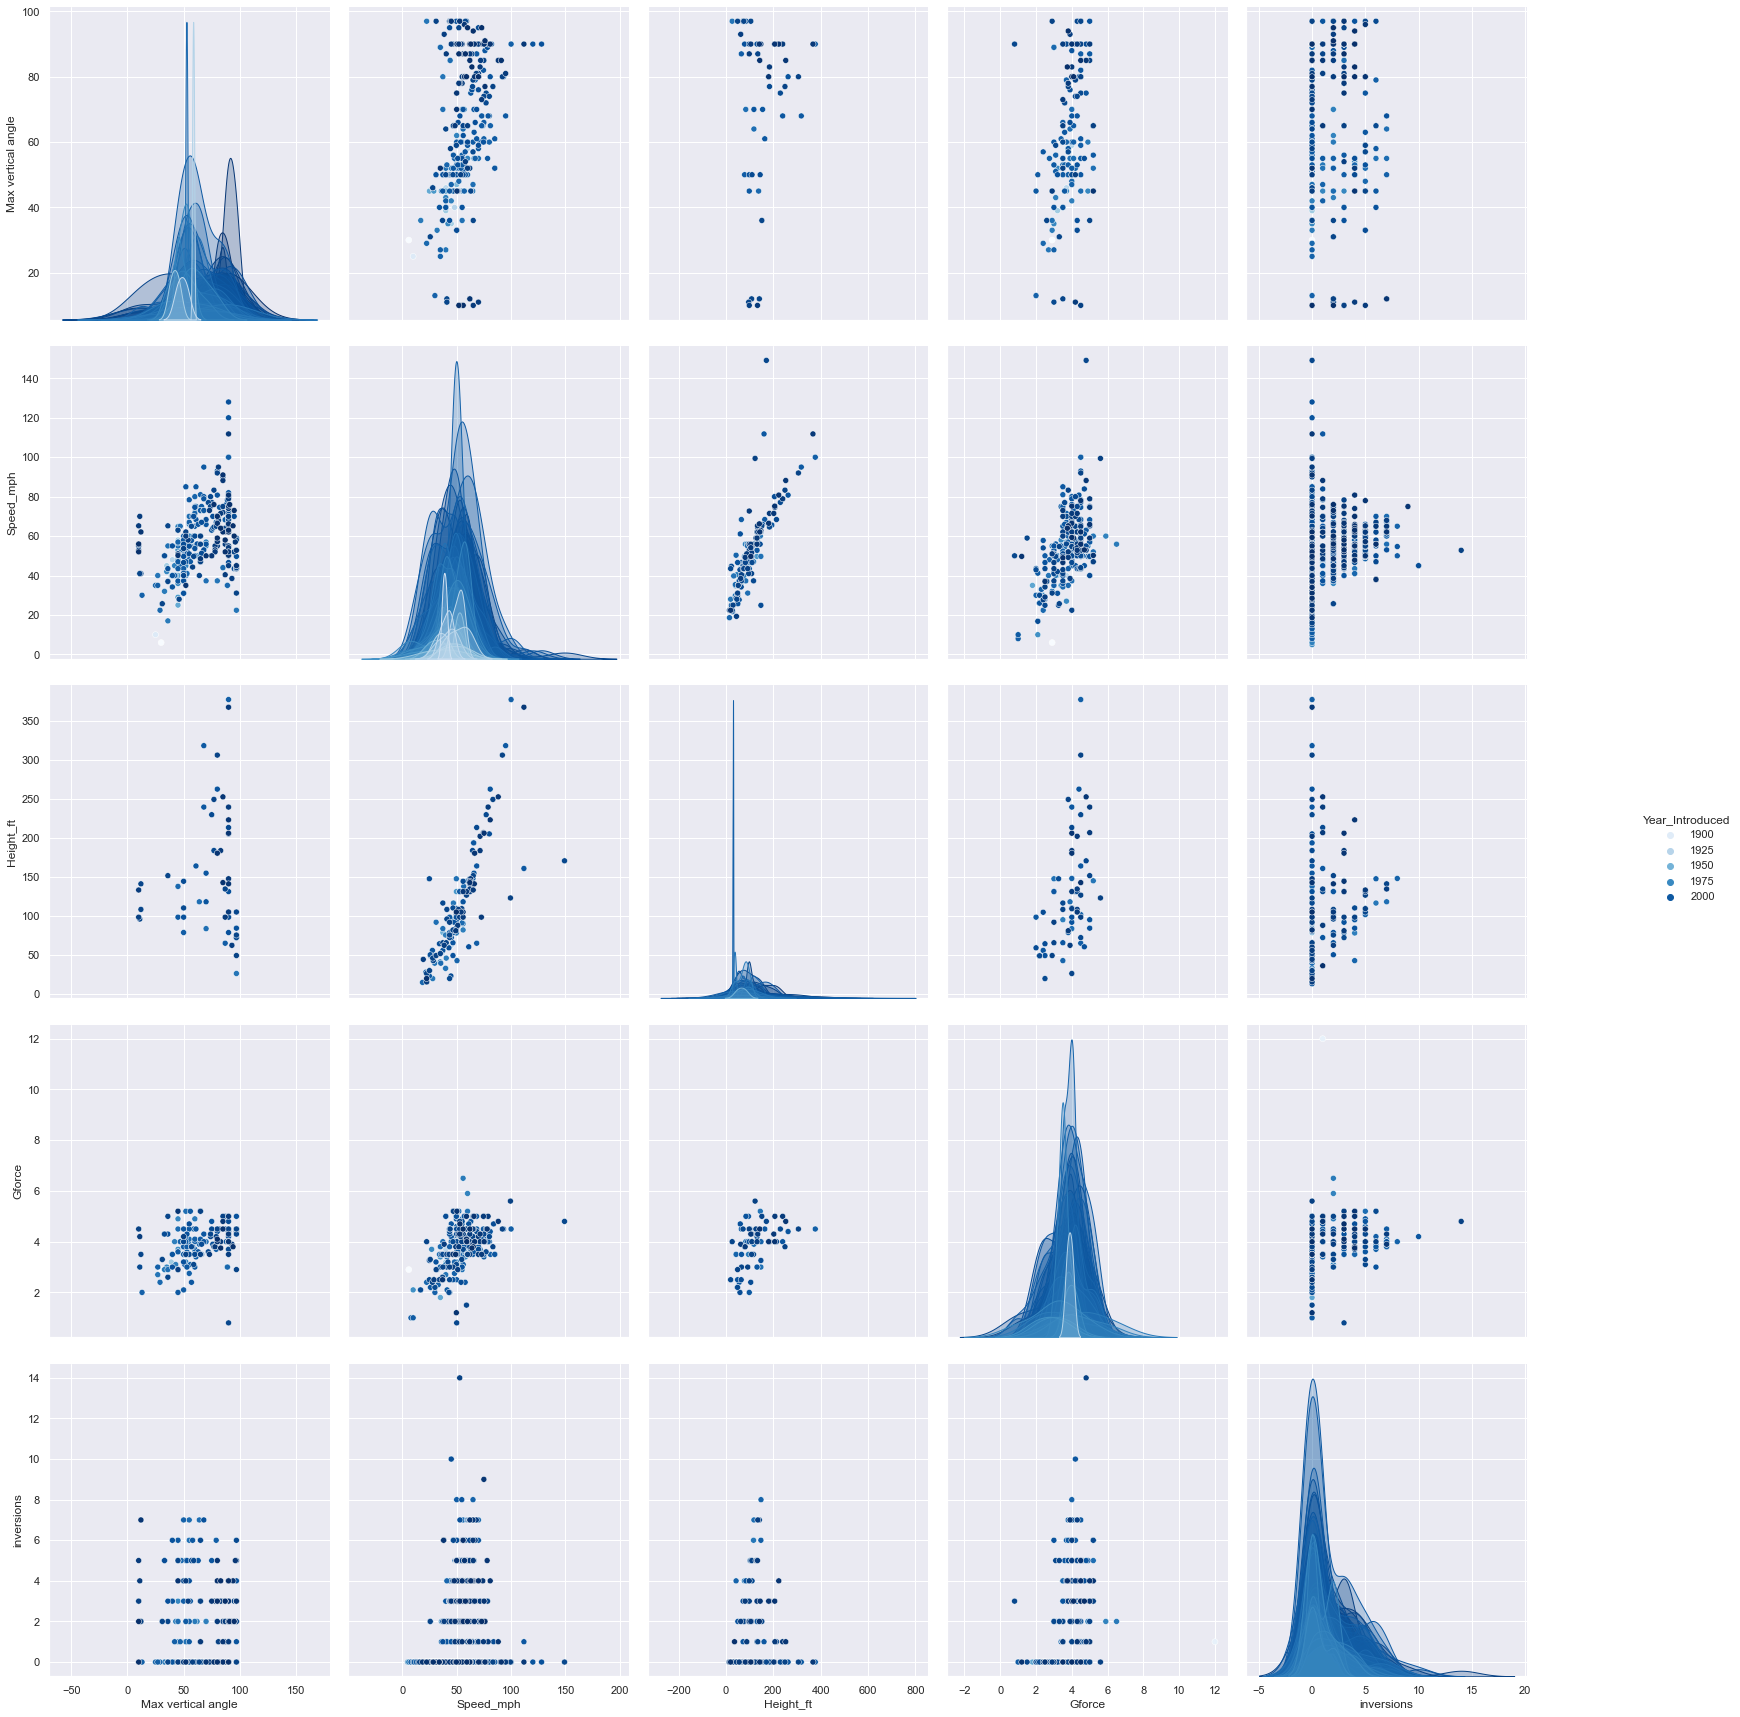

In [92]:
s = sns.pairplot(week7, vars=['Max vertical angle', 'Speed_mph', 'Height_ft', 'Gforce', 'inversions'], hue='Year_Introduced', palette='Blues').fig.set_size_inches(25,25)
plt.title('Correlation Matrix', fontdict=title_font);

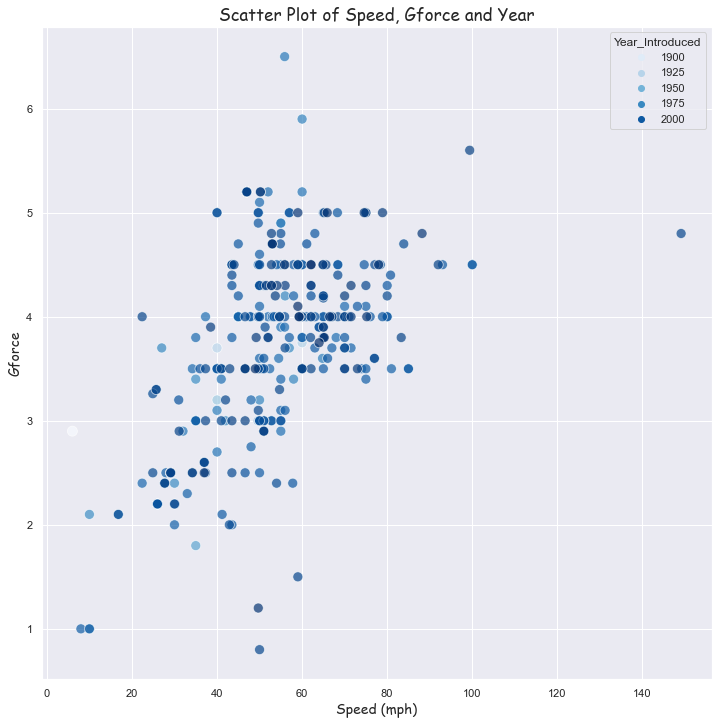

In [109]:
sns.scatterplot(data=week7, x='Speed_mph', y='Gforce', hue='Year_Introduced', s=100, alpha = 0.7, palette='Blues')
plt.title('Scatter Plot of Speed, Gforce and Year', fontdict = title_font)
plt.ylabel('Gforce', fontdict=label_font)
plt.xlabel('Speed (mph)', fontdict=label_font);

Later models tend to have higher speed and Gforce

### Additional Plots

In [42]:
def count_plot(no:int, y, title, ylabel):
    '''This function plots count in group of two'''

    # arrange the bars in order of frequency
    count_a = y.value_counts()[:10]
    count_b = y.value_counts(normalize = True)*100
    
    # set subplots
    ax = plt.subplot(1,2,no,)

    # plot the countplot
    ax1 =sns.countplot(y = y, order = count_a.index, color=plot_color)
    
    # setting labels
    label = [f' {p[0]} | {p[1]:.2f}%' for p in zip(count_a, count_b)]
    ax1.bar_label(container=ax.containers[0], labels=label)
    
    # display graph labels
    plt.title(title, fontdict = title_font)
    plt.ylabel(ylabel, fontdict = label_font)
    plt.xlabel('')
    plt.xticks([])
    plt.yticks(fontsize = 12)

    # prevent overflow of labels
    plt.tight_layout()

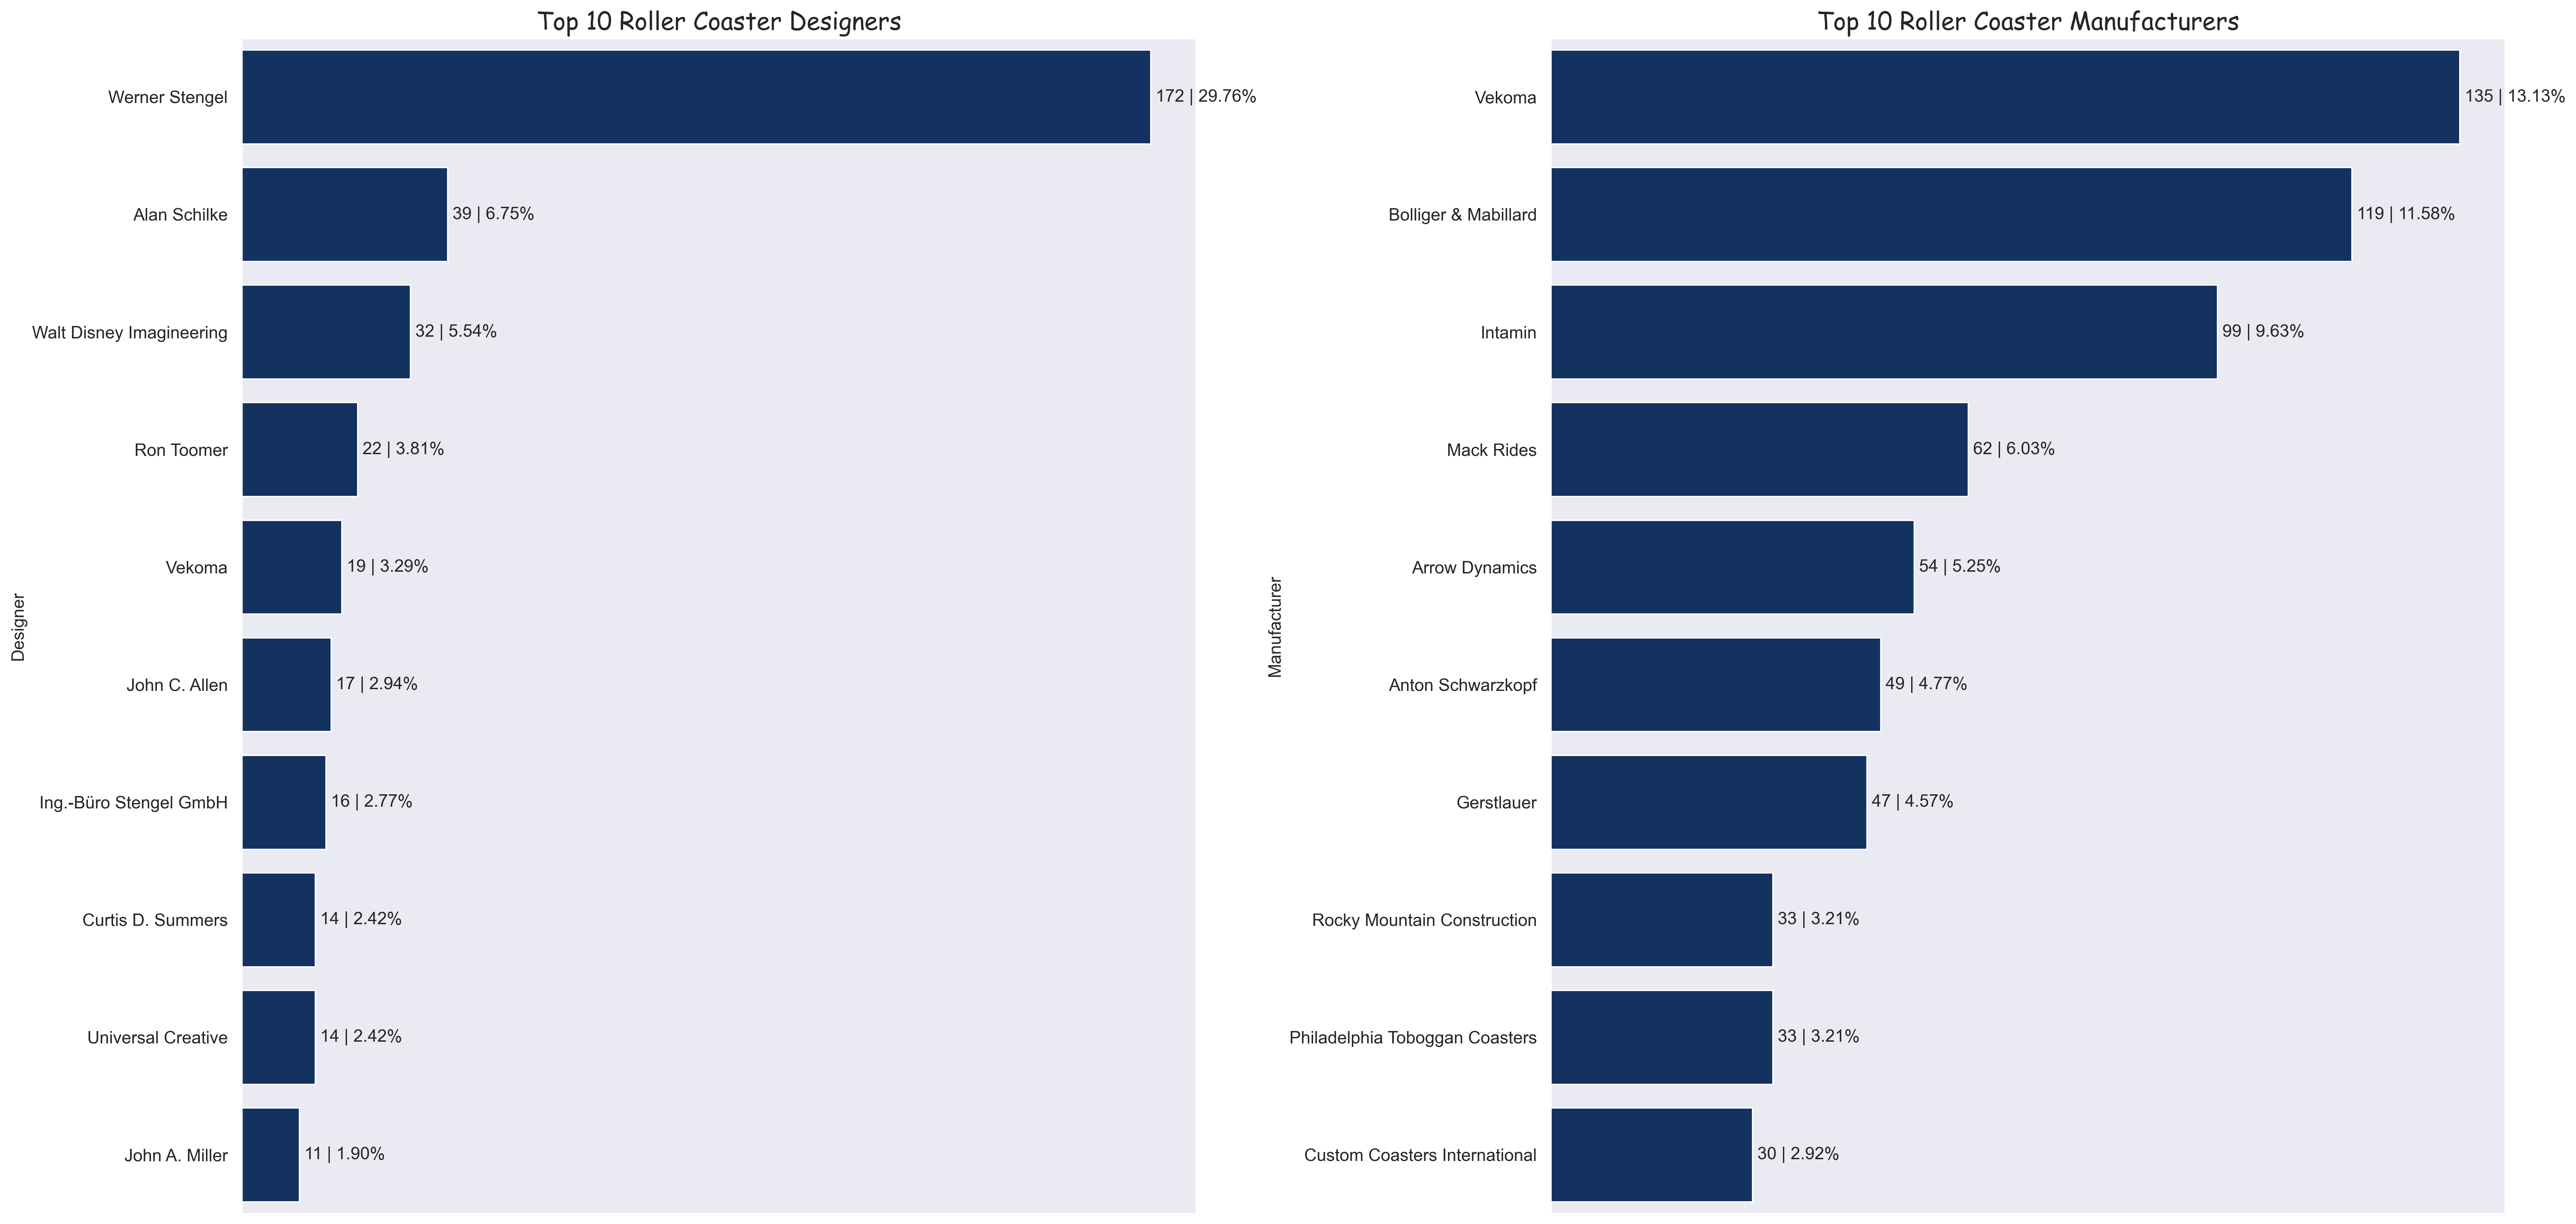

In [63]:
# count plot for Designers and Manufacturers
plt.figure(figsize=[25,12], dpi=300)
count_plot(1, week7['Designer'], 'Top 10 Roller Coaster Designers', 'Designer')
count_plot(2, week7['Manufacturer'], 'Top 10 Roller Coaster Manufacturers', 'Manufacturer')

The top designer of roller coaster is Warner Stengel and the Top manufacturer is Vekoma. Vekoma also designs roller coaster but only 19 from our dataset were designed by Vekoma. 

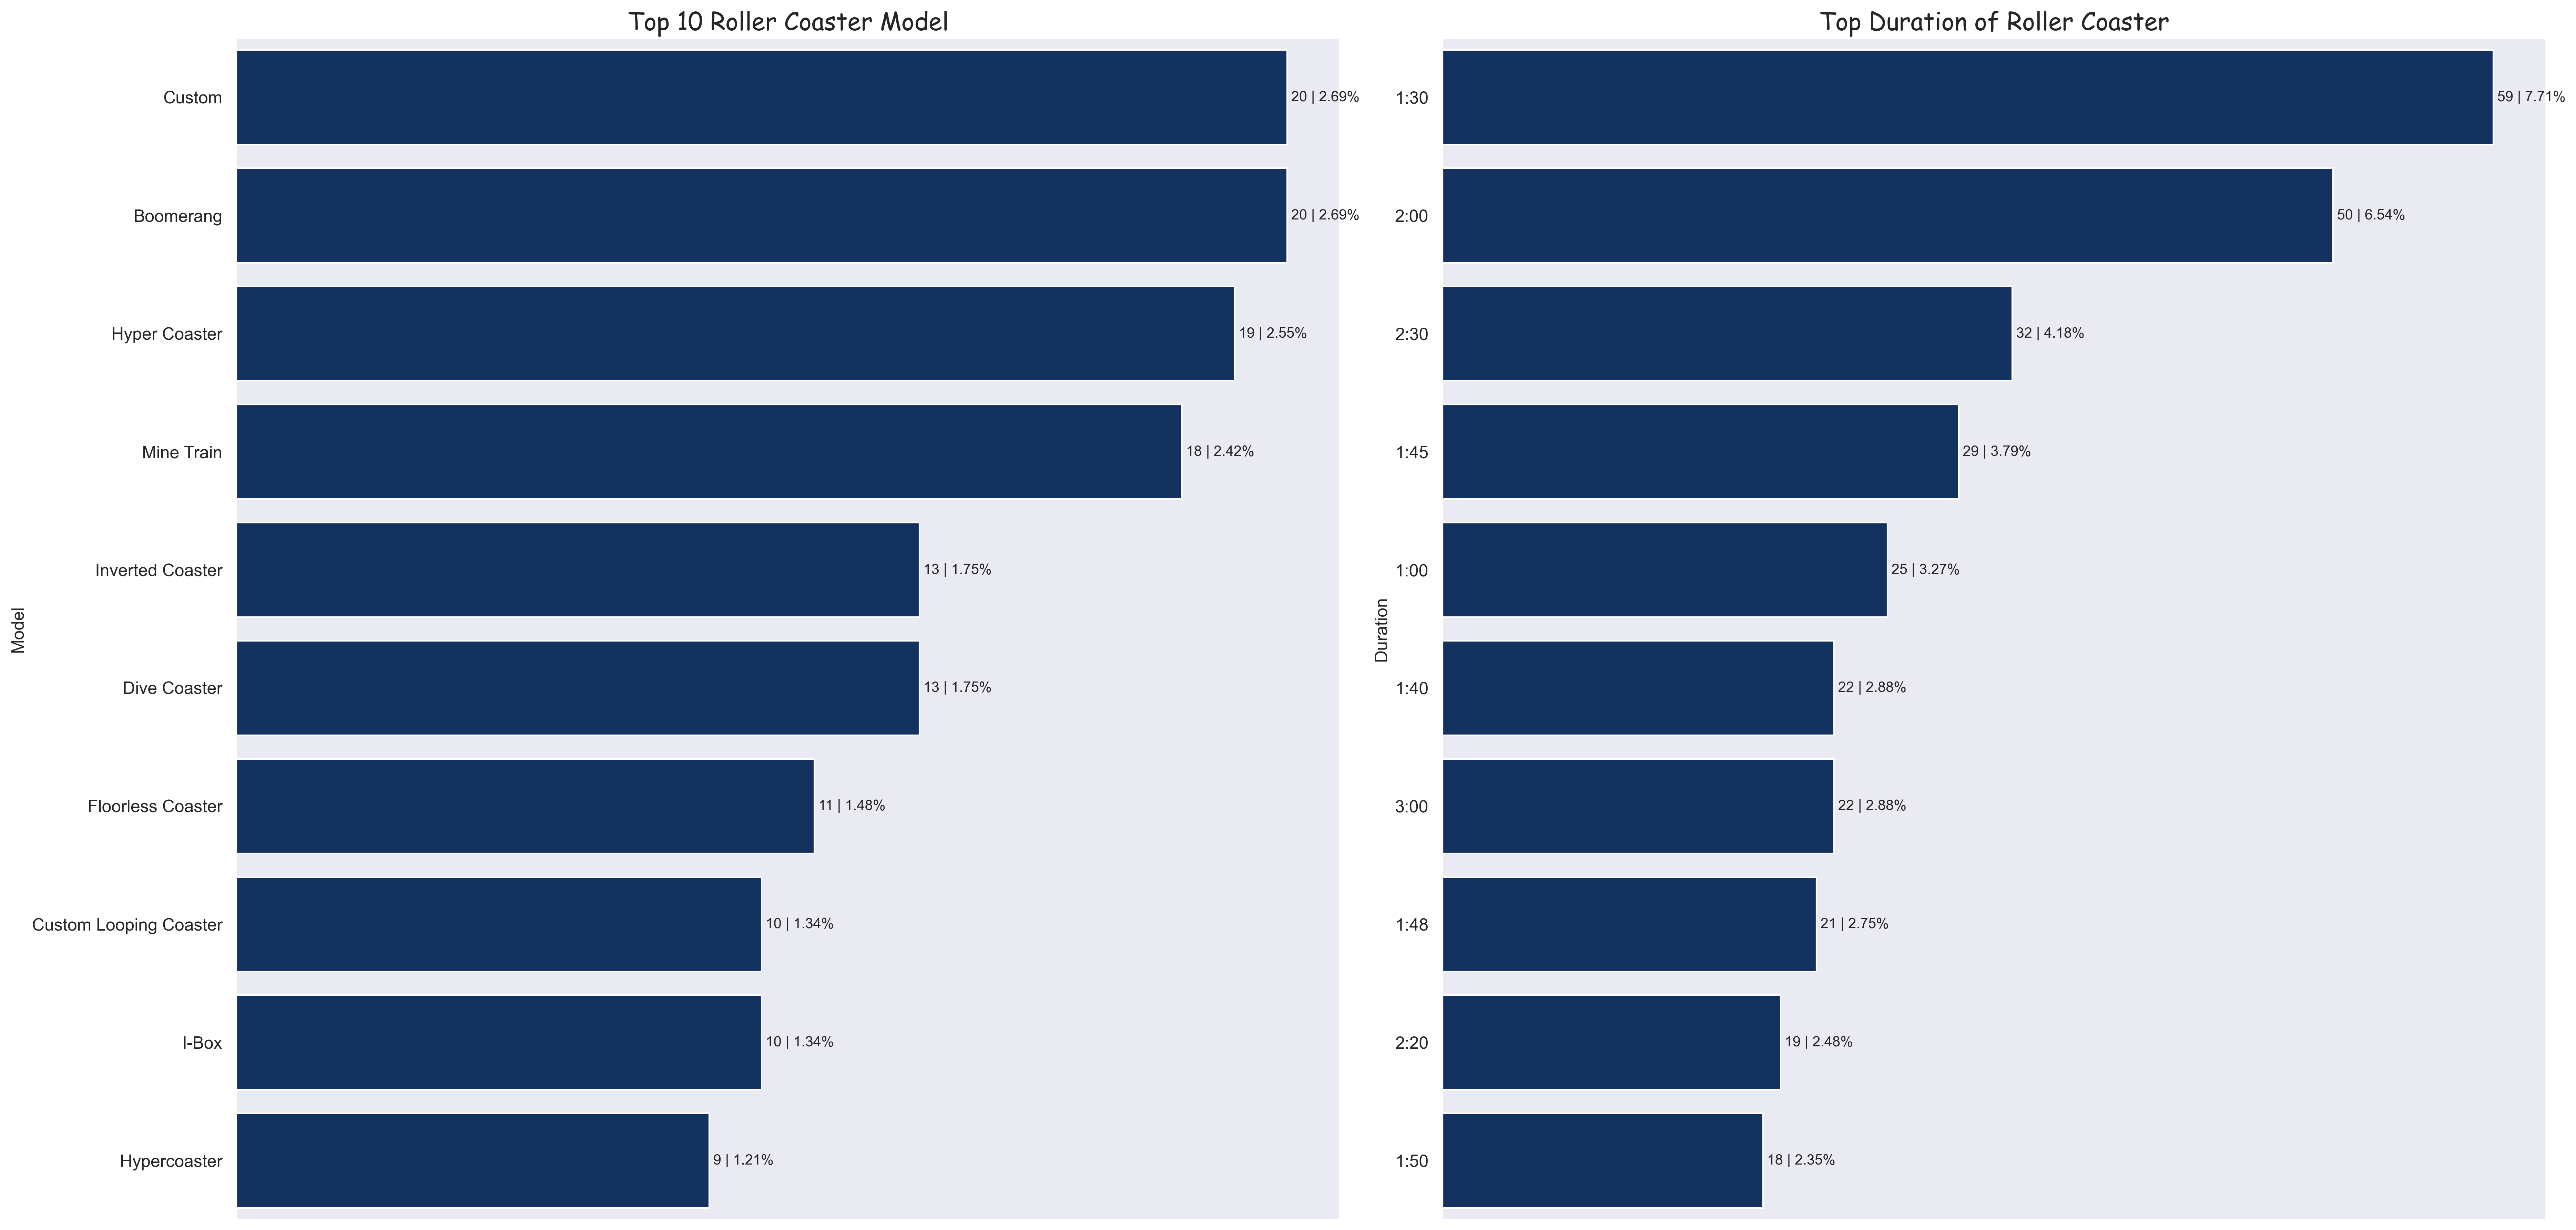

In [18]:
# count plot for Models and Duration
plt.figure(figsize=[25,12], dpi=300)
count_plot(1, week7['Model'], 'Top 10 Roller Coaster Model', 'Model')
count_plot(2, week7['Duration'], 'Top Duration of Roller Coaster', 'Duration')

The top model for roller coaster is a tie between Custom and Boomerang. The top duration which the ride lasts for is 1 minute 30 seconds followed by 2 minutes. 

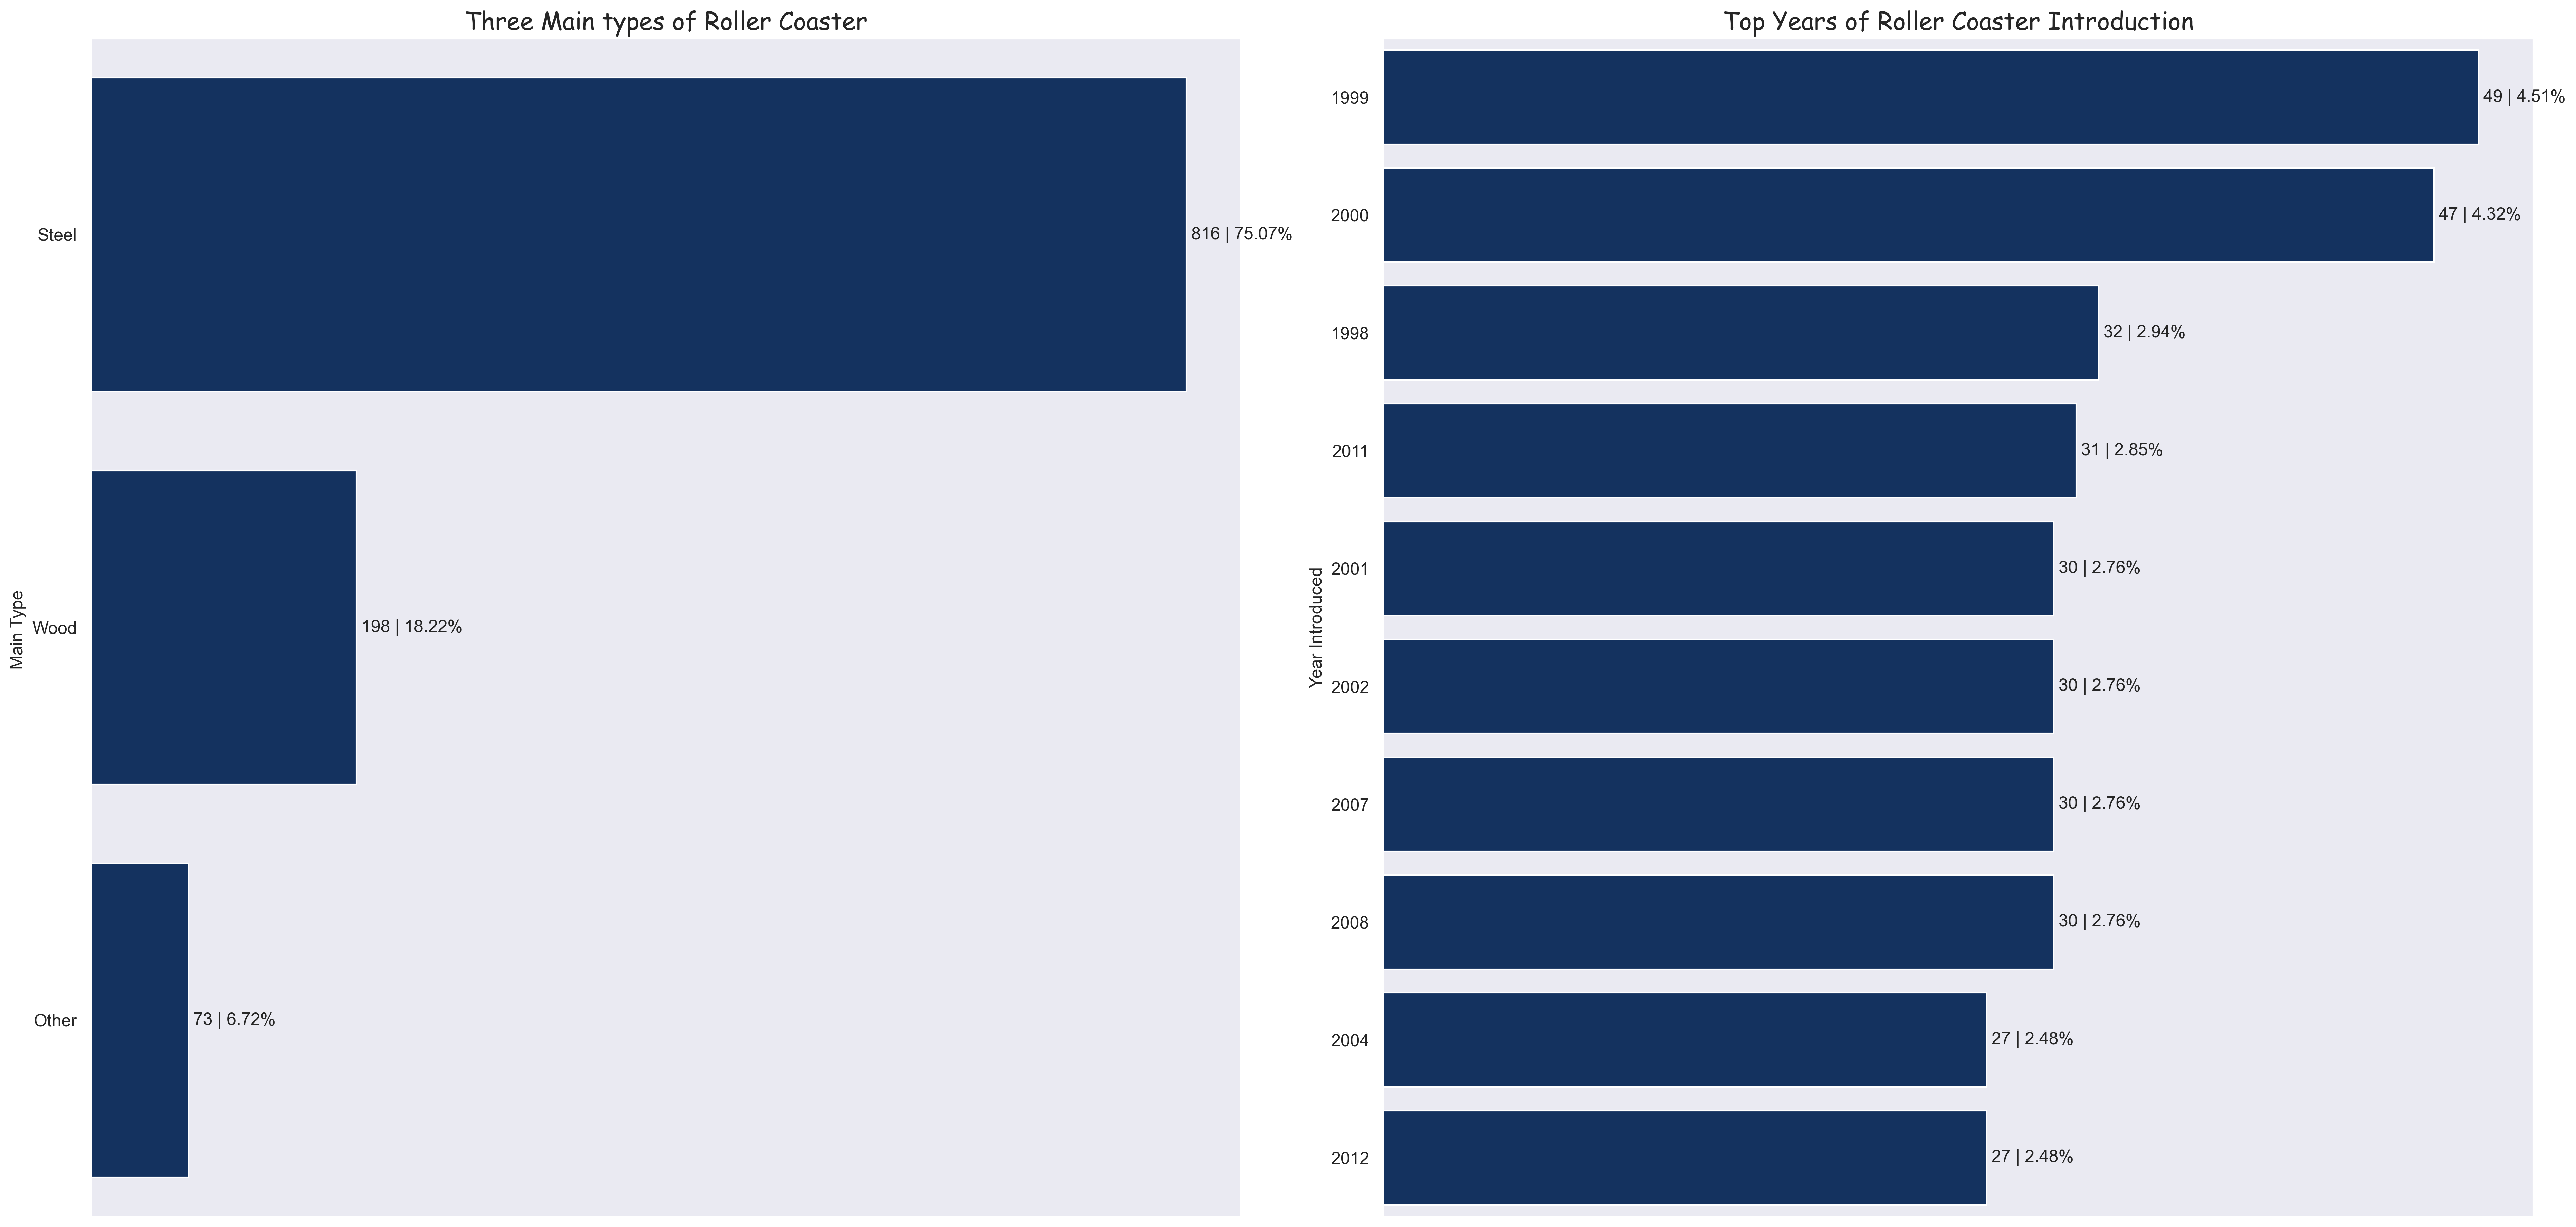

In [54]:
# count plot for Year Introduced and Main Type
plt.figure(figsize=[25,12], dpi=300)
count_plot(1, week7['Type_Main'], 'Three Main types of Roller Coaster', 'Main Type ')
count_plot(2, week7['Year_Introduced'], 'Top Years of Roller Coaster Introduction', 'Year Introduced')

The three main type of roller coasters are Steel, Wood and others. 1999 saw the most introduction of roller coasters at 49 followed by 2000 at 47. This could be an indication of a boom in the popularity of roller coasters in the 90's and early 2000's.

In [21]:
#!jupyter nbconvert --to webpdf --allow-chromium-download Week_7_Pandas.ipynb